# Chapter 4 | Training Models

## Linear Regression

a simple regression model of life satisfaction :  
$\text{life_satisfaction} = \theta_0 + \theta_1 \times \text{GPD}\_per\_capita $

### The Normal Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x_0 + noise

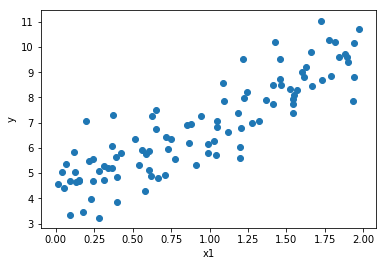

In [2]:
%matplotlib inline

plt.scatter(X, y)
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
print(f"Original function : y = 4 + 3x_0 + noise")
print(f"Theat best function : y = {theta_best[0][0]:.2f} + {theta_best[1][0]:.2f}x_0")

Original function : y = 4 + 3x_0 + noise
Theat best function : y = 4.22 + 2.77x_0


Now we can make predictions

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

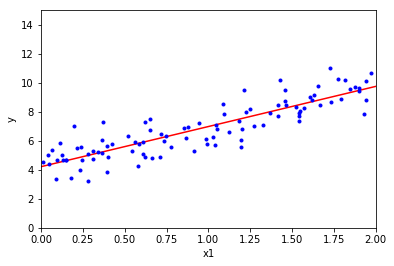

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

Equivalent in Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(f"Prediction : {lin_reg.predict(X_new)}")

[4.21509616] [[2.77011339]]
Prediction : [[4.21509616]
 [9.75532293]]


## Gradient Descent

In [8]:
# Gradient Descent alogrithm implementation

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

In [9]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[4.18475289],
       [2.73036719]])

In [10]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

C:\tools\Anaconda3\envs\mlbook\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.2287996]), array([2.79011436]))

### Mini-batch Gradient Descent

instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches.

![Figure 4-11. Gradient Descent paths in parameter space](./images/chap4/figure4.11.png "Logo Title Text 1")

## Polynomial Regression

What if your data is actually more complex than a simple straight line?

In [12]:
m = 100
X = np.array(6 * np.random.rand(m, 1) - 3)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

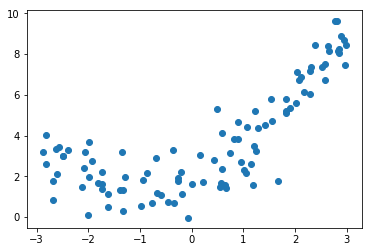

In [13]:
plt.scatter(X, y)
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(f"X[0] : {X[0]}")
print(f"X_poly[0] : {X_poly[0]}")

X[0] : [2.94407494]
X_poly[0] : [2.94407494 8.66757727]


In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
lin_reg.intercept_, lin_reg.coef_

(array([1.89554823]), array([[0.95707476, 0.49025797]]))

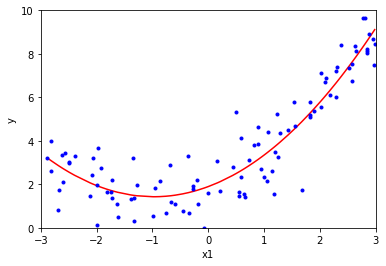

In [17]:
y_predict = (X**2).dot(lin_reg.coef_[0, 1]) + X.dot(lin_reg.coef_[0, 0]) + lin_reg.intercept_

lists = sorted(zip(*[X, y_predict]))
new_x, new_y = list(zip(*lists))

plt.plot(new_x, new_y, "r")
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

## Learning Curves

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc='upper right')

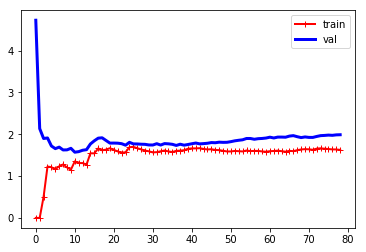

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Check the results for a 10th degree polynomial model on the same data

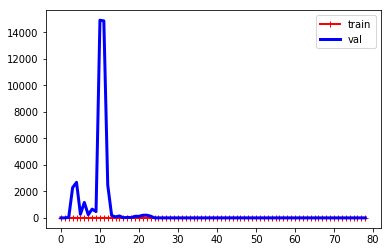

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))
plot_learning_curves(polynomial_regression, X, y)

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

## Regularized Linear Models

### Ridge Regression

Also known as *Tikhonow regularization* -> $\alpha\sum_{i=1}^n \theta_i^2$

Ridge Regression cost function : $J(\theta) = \text{MSE}(\theta) + \alpha\frac{1}{2}\sum_{i=1}^n \theta_i^2$

In [21]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.07720864]])

In [22]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=50, tol=1e-3)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.08461165])

### Lasso Regression

Lasso Regression cost function : $J(\theta) = \text{MSE}(\theta) + \alpha\frac{1}{2}\sum_{i=1}^n \lvert\theta_i\rvert$

![Figure 4-18. Lasso Regression](./images/chap4/figure4.18.png)

In [23]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.04247738])

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression.

Elastic Net Regression cost function : $J(\theta) = \text{MSE}(\theta) + r\alpha\sum_{i=1}^n \lvert\theta_i\rvert + \frac{1 - r}{2}\alpha\sum_{i=1}^n \theta_i^2$

In [24]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X, y)
elastic_reg.predict([[1.5]])

array([5.04191364])

### Early Stopping

Stop training when some parameter reaches a threshold.

In [25]:
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=500, tol=1e-3, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None

X_train_poly, X_val_poly, y_train, y_val = train_test_split(X_poly, y, test_size=0.2)

for epoch in range(1000):
    sgd_reg.fit(X_train_poly, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
best_epoch, best_model

(113,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=500,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
        verbose=0, warm_start=True))

## Logistic Regression

Logistic Regression model estimated probability (vectorized form)

$\hat{p} = h_\theta(x) = \sigma\left(\theta^{\text{T}} \cdot x\right)$

$\sigma(t) = \frac{1}{1 + exp(-t)}$

### Decision Boundaries

In [26]:
from sklearn.datasets import load_iris

iris = load_iris()

In [27]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [28]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

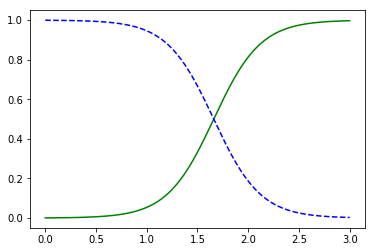

In [30]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [31]:
### p.139 \ Softmax Regression